Name: Jiaxuan Zhang

Andrew ID: jiaxuanz

Collaborators (if none, say "none"; do *not* leave this blank): none

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In particular, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

**Throughout this problem, do not remove stopwords.**

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser', 'tagger'])
`

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)); these 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Note: Please *do not* change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

**(a) [5 pts]** As a warm-up, write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`).

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [1]:
import glob
for book in glob.glob('./HW1_Dataset/*.txt'):
    path = book.split("\\")[1]
    with open(book, 'r', encoding = 'utf-8') as myFile:
        data = myFile.read() 
    print('File name: %s \nLength:    %d' % (path, len(data)))
    

File name: A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (265).txt 
Length:    177758
File name: A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 
Length:    765918
File name: A Modest Proposal by Jonathan Swift (233).txt 
Length:    38966
File name: A Study in Scarlet by Arthur Conan Doyle (163).txt 
Length:    262340
File name: A Tale of Two Cities by Charles Dickens (425).txt 
Length:    776702
File name: Adventures of Huckleberry Finn by Mark Twain (401).txt 
Length:    593962
File name: Alice in Wonderland by Lewis Carroll and Alice Gerstenberg (126).txt 
Length:    104079
File name: Alice's Adventures in Wonderland by Lewis Carroll (564).txt 
Length:    163817
File name: Anne of Green Gables by L. M.  Montgomery (114).txt 
Length:    580635
File name: Autobiography of Benjamin Franklin by Benjamin Franklin (247).txt 
Length:    458600
File name: Beowulf An Anglo-Saxon Epic Poem (403).txt 
Length:    292953
File name: Beyond Go

File name: War and Peace by graf Leo Tolstoy (251).txt 
Length:    3227580
File name: Wuthering Heights by Emily Bronte虉 (179) (Unicode Encoding Conflict).txt 
Length:    669150


**(b) [15 pts]** Build a term frequency table for all 100 books. Specifically, building on your solution to part (a), read in a single book at a time and for each book, do the following two steps:

  1. Process the text by separating and lemmatizing the words.
  2. Count the number of times each word appears in the book and add these to a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)

Note that unlike in part (a), this time around, there's no need to print out the file names and how long each book is.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [2]:
import spacy
import glob
from collections import Counter
from operator import itemgetter
import re
# Sort the table and print the top 50 most frequent words, along with their frequencies and ranks.

histogram = Counter()
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser', 'tagger'])
nlp.max_length = 100000000

for book in glob.glob('./HW1_Dataset/*.txt'):
    text = open(book, encoding='utf-8').read()
    parsed_text = nlp(text)
    for token in parsed_text:
        lemma = token.lemma_
        if re.match('[a-zA-Z]+$', lemma):
            histogram[lemma] += 1
        
sorted_token_count_pairs = sorted(histogram.items(), reverse=True, key=lambda x:x[1])

print('%s  %s  %s' % ('Rank', 'Lemma', 'Frequency'))
for rank, (lemma, count) in enumerate(sorted_token_count_pairs[:50]):
    print('%2d  %7s  %d' % (rank+1, lemma, count))

Rank  Lemma  Frequency
 1      the  600164
 2       be  397308
 3      and  365413
 4       of  343175
 5        a  313288
 6       to  287765
 7        I  178430
 8       in  177564
 9     have  175228
10     that  146495
11       it  104392
12       he  102540
13      not  101908
14      his  97466
15      you  94381
16     with  91596
17      for  79873
18      her  65256
19       my  63905
20     this  60392
21       on  58058
22       at  56883
23       do  56366
24      him  55864
25      say  55818
26       me  55546
27       by  52517
28      all  51314
29    which  51001
30      but  49544
31      The  48131
32     from  44411
33     they  43349
34     much  43060
35       or  41329
36     will  41258
37      she  40483
38      And  39283
39      can  38951
40       so  37615
41     them  35954
42      man  35890
43      one  35079
44    their  32599
45       go  31582
46       we  30583
47    would  30284
48      see  29197
49     come  29107
50       no  28704


**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

Text(0, 0.5, 'Frequency')

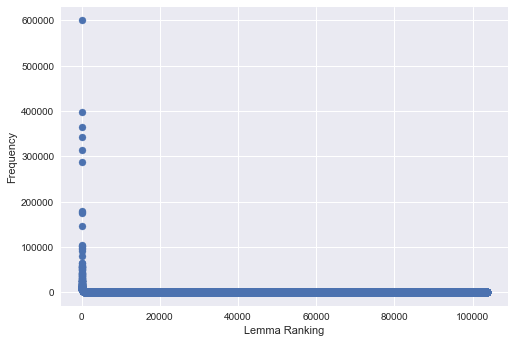

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

freq = [count for lemma, count in sorted_token_count_pairs]

plt.scatter(range(1, len(sorted_token_count_pairs)+1), freq)
plt.xlabel('Lemma Ranking')
plt.ylabel('Frequency')

Text(0, 0.5, 'Log Frequency')

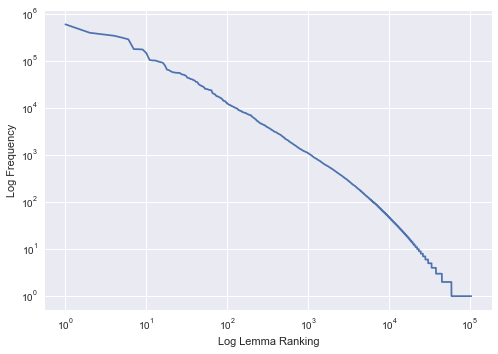

In [4]:
plt.loglog(range(1, len(sorted_token_count_pairs)+1), freq)
plt.xlabel('Log Lemma Ranking')
plt.ylabel('Log Frequency')

**(d) [15 pts]** Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): 

In the log-log plot above, there is a obvious inverse ratio between the ranking and frequency. This is probably consistent with the power law if we test the value of c here. 

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [5]:
sum_all, sum_4, sum_50 = 0, 0, 0
for rank, f in enumerate(freq):
    sum_all += f
    if rank < 4:
        sum_4 += f
    if rank < 50:
        sum_50 += f

print('Probability of drawing one of the 4 most frequent words: %.2f%%' % (sum_4/sum_all*100))


print('Probability of drawing one of the 50 most frequent words: %.2f%%' % (sum_50/sum_all*100))

Probability of drawing one of the 4 most frequent words: 15.15%
Probability of drawing one of the 50 most frequent words: 45.53%


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [6]:
max_word = len(sorted_token_count_pairs)
word_one_time = [word for (word, freq) in sorted_token_count_pairs if freq == 1]
word_fewer_than_ten_time = [word for (word, freq) in sorted_token_count_pairs if freq < 10]

print("Occur only once: %.2f%%" % (len(word_one_time) / max_word * 100))
print("Occur fewer than 10 times: %.2f%%" % (len(word_fewer_than_ten_time) / max_word * 100))


Occur only once: 43.18%
Occur fewer than 10 times: 77.54%


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
`


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]

Text(0, 0.5, 'Frequency')

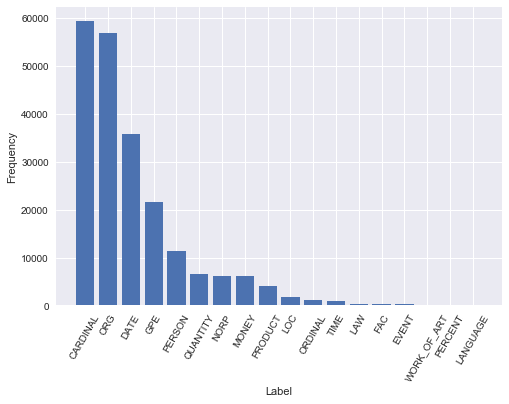

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

label_counter = Counter()
for article in reuters_nlp:
    for entity in article.ents:
        label_counter[entity.label_] += 1
sorted_label_count_pairs = sorted(label_counter.items(),
                                 key=lambda x:x[1],
                                 reverse=True)
label = [l for l, freq in sorted_label_count_pairs]
freq = [freq for l, freq in sorted_label_count_pairs]

plt.bar(label, freq)
plt.xticks(rotation=60)
plt.xlabel('Label')
plt.ylabel('Frequency')

**(b) [15 pts]** Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (geopolitical entity such as countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [9]:
entity_counter_ORG = Counter()  
entity_counter_GPE = Counter()  
for article in reuters_nlp:
    ORG_entity = list(set([ent.lemma_ for ent in article.ents if ent.label_ == 'ORG'])) # Use set to ensure the uniqueness of the entity
    GPE_entity = list(set([ent.lemma_ for ent in article.ents if ent.label_ == 'GPE']))
    for org in ORG_entity:
        entity_counter_ORG[org] += 1
    for gpe in GPE_entity:
        entity_counter_GPE[gpe] += 1
        
sorted_entity_count_pairs_ORG = sorted(entity_counter_ORG.items(),
                                 key=lambda x:x[1],
                                 reverse=True)
sorted_entity_count_pairs_GPE = sorted(entity_counter_GPE.items(),
                                 key=lambda x:x[1],
                                 reverse=True)
print('%s  %37s  %s  %20s  %s' % ('Ranking', 'Entity_ORG', 'Occurence', 'Entity_GPE', 'Occurence'))
for i in range(10):
    print('%2d  %42s  %9d  %20s  %9d' % (i+1, sorted_entity_count_pairs_ORG[i][0], sorted_entity_count_pairs_ORG[i][1], 
                                  sorted_entity_count_pairs_GPE[i][0], sorted_entity_count_pairs_GPE[i][1]))
        

Ranking                             Entity_ORG  Occurence            Entity_GPE  Occurence
 1                                         mln       2368                  U.S.       1737
 2                                         cts       1264                 Japan        535
 3                                         pct       1097     the United States        349
 4                                         QTR       1001                  U.K.        287
 5                                     Reuters        431              New York        259
 6      the Securities and Exchange Commission        244                Canada        250
 7                                          EC        234            Washington        240
 8                                         MLN        214          West Germany        232
 9                                        USDA        195                London        191
10                                    Treasury        157                Brazil        189

**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [10]:
occurence_GPE = Counter() # To count the occurence of GPE: numerator
occurence_opec_GPE = Counter() # To count the co-occurence of GPE and opec: denominator
for article in reuters_nlp:
    ORG_entity = list(set([ent.lemma_ for ent in article.ents if ent.label_ == u'ORG']))
    GPE_entity = list(set([ent.lemma_ for ent in article.ents if ent.label_ == u'GPE']))
    for gpe in GPE_entity:
        occurence_GPE[gpe] += 1
    if u'OPEC' in ORG_entity:
        for gpe in GPE_entity:
            occurence_opec_GPE[gpe] += 1

unsorted_PMI = {ent: occurence_opec_GPE[ent] / occurence_GPE[ent] for ent in occurence_opec_GPE}
sorted_PMI = sorted(unsorted_PMI.items(), key=lambda x:x[1], reverse=True)  # sorted by PMI value (part of calculation)

print('%s  %22s  %s  %s' % ('Rank', 'Entity', 'Co-occurence', 'Occurence'))
for idx, (ent, pmi) in enumerate(sorted_PMI[:50]):
    print('%2d  %24s  %12d  %9d' % (idx+1, ent, occurence_opec_GPE[ent], occurence_GPE[ent]))

Rank                  Entity  Co-occurence  Occurence
 1                     ADNOC             1          1
 2                      I.E.             1          1
 3                Miraflores             1          1
 4                  Emirates             2          2
 5                  Bethesda             1          1
 6                     Gabon             2          2
 7                     Bonny             1          1
 8              Neutral Zone             2          2
 9                     qatar             1          1
10                     Yanbu             2          2
11                   Tripoli             2          2
12                   Visnews             3          3
13                      Doha             1          1
14                   BAHRAIN             1          1
15    VENEZUELA Ecuador have             1          1
16         non - OPEC Mexico             1          1
17                 Maracaibo             2          2
18                   Tihamah

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

There are several entities like Qatar and Vienna that are expected to be ranked higher in this list since they are directly relevant to OPEC. However, the entities with highest ranking are not all we hope for. This can be caused by several reason: 
1. the dataset(number of documents) is too small for statistical inference 
2. the entity recognization rule in Spacy may be not very perfect. 
3. The definition of PMI reveals that the rare words often get high value.

### [Problem 3] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/mxaGJbcEenDC9cvk6